<a href="https://colab.research.google.com/github/BoneZhou/Application-of-AI/blob/main/Object_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
import torch
import torchvision.transforms as T
from torchvision.models.detection import fasterrcnn_resnet50_fpn
from PIL import Image
import matplotlib.pyplot as plt

In [64]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [65]:
model = fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()


FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

In [66]:
def transform_image(image_path):
    image = Image.open(image_path).convert("RGB")
    transform = T.Compose([T.ToTensor()])
    image = transform(image)
    return image.unsqueeze(0)

image_path = '/content/drive/MyDrive/Colab-Notebooks/segmentation2.jpg'
image_tensor = transform_image(image_path)

In [67]:
with torch.no_grad():
    prediction = model(image_tensor)

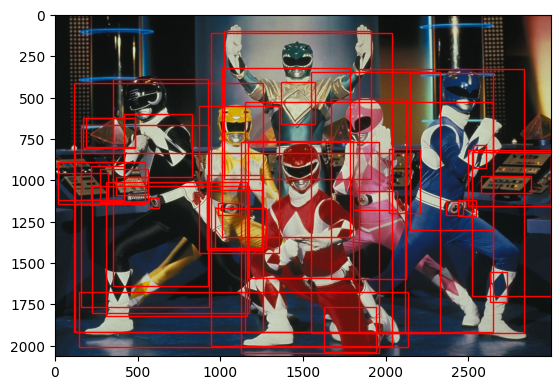

In [68]:
def plot_predictions(image_path, prediction):
    image = Image.open(image_path)
    plt.imshow(image)

    prediction_boxes = prediction[0]['boxes']
    for box in prediction_boxes:
        xmin, ymin, xmax, ymax = box
        rect = plt.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, fill=False, color='red')
        plt.gca().add_patch(rect)
    plt.show()

plot_predictions(image_path, prediction)

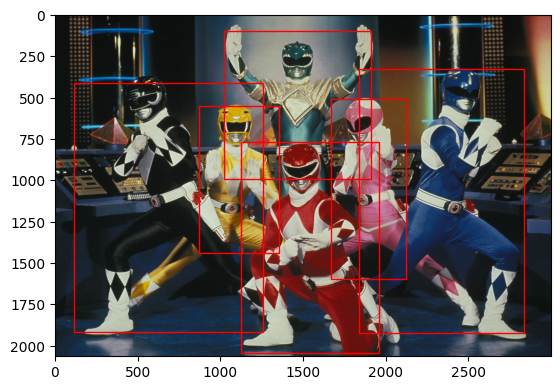

In [69]:
scores = prediction[0]['scores']
threshold = 0.7
selected_boxes = prediction[0]['boxes'][scores > threshold]
def plot_predictions_score(image_path, selected_boxes):
    image = Image.open(image_path)
    plt.imshow(image)

    for box in selected_boxes:
        xmin, ymin, xmax, ymax = box
        rect = plt.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, fill=False, color='red')
        plt.gca().add_patch(rect)
    plt.show()

plot_predictions_score(image_path, selected_boxes)